# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [343]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [344]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [345]:
# put your answer here
df_columns = df.columns

print(df_columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [346]:
# put your answer here
df.shape

(8807, 12)

In [347]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [348]:
# put your answer here
missing_counts = df.isnull().sum()
print(missing_counts)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Drop rows where duration is missing. Save to df_clean.

In [349]:
# put your answer here
df_clean = df.dropna(subset=['duration'])

In [350]:
df_clean.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [351]:
# put your answer here
df_num = df.select_dtypes(include=['number'])

print(df_num)

      release_year
0             2020
1             2021
2             2021
3             2021
4             2021
...            ...
8802          2007
8803          2018
8804          2009
8805          2006
8806          2015

[8807 rows x 1 columns]


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [352]:
print(df_clean['duration'])

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8804, dtype: object


In [353]:
genres_df = df_clean['listed_in'].str.split(',', expand=True).stack()
genres_df = genres_df.str.strip()
all_genres_alt = sorted(genres_df.unique())
print(f"\nTotal unique genres: {len(all_genres_alt)}")
print(all_genres_alt)


Total unique genres: 42
['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']


In [354]:
import numpy as np
import pandas as pd

# First, let's examine the duration column
print("Sample duration values:")
print(df_clean['duration'].value_counts().head(10))
print("\n")

# Define average episode length by genre category (in minutes)
def get_episode_length(genres_str):
    """Determine episode length based on genres"""
    if pd.isna(genres_str):
        return 40  # default

    genres_lower = genres_str.lower()

    # Comedy shows tend to be shorter (20-25 min)
    if any(word in genres_lower for word in ['comedy', 'comedies', 'stand-up']):
        return 22

    # Kids shows are typically shorter (20-25 min)
    elif any(word in genres_lower for word in ['kids', 'children', 'teen']):
        return 23

    # Anime episodes are typically 24 minutes
    elif 'anime' in genres_lower:
        return 24

    # Reality TV varies but averages around 40-45 min
    elif 'reality' in genres_lower:
        return 42

    # Documentaries and docuseries tend to be longer (45-50 min)
    elif any(word in genres_lower for word in ['documentaries', 'docuseries']):
        return 45

    # Drama, thrillers, crime shows are typically 45-50 min
    elif any(word in genres_lower for word in ['drama', 'thriller', 'crime', 'mystery', 'horror']):
        return 45

    # Default for other TV shows
    else:
        return 40

# Estimate episodes per season (industry average)
EPISODES_PER_SEASON = 10  # Netflix shows typically have 8-13 episodes per season

def convert_duration_to_minutes(row):
    """Convert duration to minutes based on format"""
    duration_str = str(row['duration'])

    # Handle already numeric values
    if duration_str.replace('.', '').isdigit():
        return float(duration_str)

    # Extract numbers from the string
    import re
    numbers = re.findall(r'\d+', duration_str)

    if not numbers:
        return np.nan

    value = int(numbers[0])

    # If it's in minutes format (e.g., "90 min")
    if 'min' in duration_str.lower():
        return value

    # If it's in seasons format (e.g., "2 Seasons")
    elif 'season' in duration_str.lower():
        episode_length = get_episode_length(row['listed_in'])
        total_minutes = value * EPISODES_PER_SEASON * episode_length
        return total_minutes

    # Default case
    else:
        return np.nan

# Apply the conversion
print("Converting duration to minutes...")
df_clean['duration_minutes'] = df_clean.apply(convert_duration_to_minutes, axis=1)

# Display results
print("\nConversion complete!")
print(f"Total rows: {len(df_clean)}")
print(f"Successfully converted: {df_clean['duration_minutes'].notna().sum()}")
print(f"Failed conversions (NaN): {df_clean['duration_minutes'].isna().sum()}")

print("\nSample conversions:")
sample_df = df_clean[['title', 'listed_in', 'duration', 'duration_minutes']].head(20)
print(sample_df.to_string())

print("\nDuration statistics:")
print(df_clean['duration_minutes'].describe())

# Optional: Replace the original duration column
# Uncomment the line below if you want to replace the original column
# df_clean['duration'] = df_clean['duration_minutes']
# df_clean.drop('duration_minutes', axis=1, inplace=True)

Sample duration values:
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
94 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64


Converting duration to minutes...

Conversion complete!
Total rows: 8804
Successfully converted: 8804
Failed conversions (NaN): 0

Sample conversions:
                                                  title                                                                 listed_in   duration  duration_minutes
0                                  Dick Johnson Is Dead                                                             Documentaries     90 min                90
1                                         Blood & Water                           International TV Shows, TV Dramas, TV Mysteries  2 Seasons               900
2                                             Ganglands             Crime TV Shows, International TV Shows, TV Action & Adventure  

/tmp/ipython-input-2540555834.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_minutes'] = df_clean.apply(convert_duration_to_minutes, axis=1)


In [355]:
# put your answer here
dur = df_clean['duration_minutes']
print(dur)

0        90
1       900
2       450
3       420
4       440
       ... 
8802    158
8803    440
8804     88
8805     88
8806    111
Name: duration_minutes, Length: 8804, dtype: int64


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

Min-Max Scaling Applied!

Original duration range: 3.00 - 7650.00 minutes
Scaled duration range: 0.00 - 1.00

Scaling formula: (X - min) / (max - min)

Sample of original vs scaled values:


/tmp/ipython-input-478797732.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dur_minmax'] = np.nan


                              title  duration_minutes  dur_minmax
0              Dick Johnson Is Dead                90    0.011377
1                     Blood & Water               900    0.117301
2                         Ganglands               450    0.058454
3             Jailbirds New Orleans               420    0.054531
4                      Kota Factory               440    0.057147
5                     Midnight Mass               450    0.058454
6  My Little Pony: A New Generation                91    0.011508
7                           Sankofa               125    0.015954
8     The Great British Baking Show              3780    0.493919
9                      The Starling               104    0.013208


/tmp/ipython-input-478797732.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[1, 0].boxplot(data_to_plot, labels=['Original', 'Scaled'], patch_artist=True)


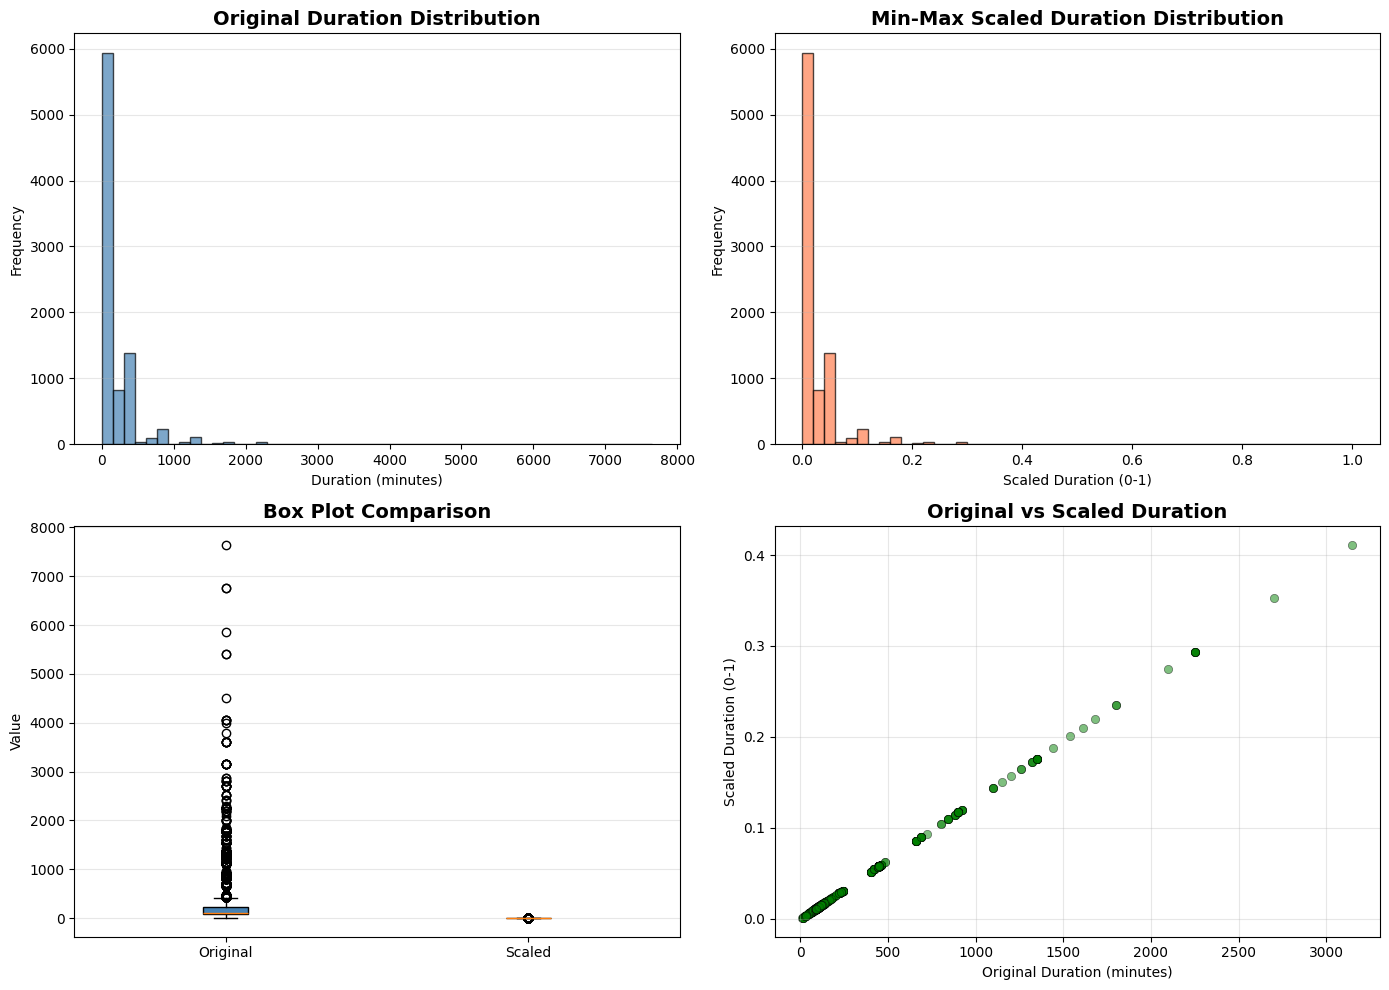


STATISTICS COMPARISON

Metric               Original             Scaled              
------------------------------------------------------------
Mean                 251.35               0.0325              
Median               112.00               0.0143              
Std Dev              390.64               0.0511              
Min                  3.00                 0.0000              
Max                  7650.00              1.0000              


In [356]:
# put your answer here
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to duration_minutes
# Remove any NaN values first
dur = df_clean['duration_minutes'].dropna().values.reshape(-1, 1)

# Initialize and fit the scaler
scaler = MinMaxScaler()
dur_minmax = scaler.fit_transform(dur)

# Add the scaled values back to the dataframe
df_clean['dur_minmax'] = np.nan
df_clean.loc[df_clean['duration_minutes'].notna(), 'dur_minmax'] = dur_minmax.flatten()

print("Min-Max Scaling Applied!")
print(f"\nOriginal duration range: {df_clean['duration_minutes'].min():.2f} - {df_clean['duration_minutes'].max():.2f} minutes")
print(f"Scaled duration range: {df_clean['dur_minmax'].min():.2f} - {df_clean['dur_minmax'].max():.2f}")
print(f"\nScaling formula: (X - min) / (max - min)")

# Display sample of scaled values
print("\nSample of original vs scaled values:")
sample = df_clean[['title', 'duration_minutes', 'dur_minmax']].dropna().head(10)
print(sample.to_string())

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Original duration distribution
axes[0, 0].hist(df_clean['duration_minutes'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Duration (minutes)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Scaled duration distribution
axes[0, 1].hist(df_clean['dur_minmax'].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Min-Max Scaled Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Scaled Duration (0-1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Box plots comparison
data_to_plot = [df_clean['duration_minutes'].dropna(), df_clean['dur_minmax'].dropna()]
box = axes[1, 0].boxplot(data_to_plot, labels=['Original', 'Scaled'], patch_artist=True)
box['boxes'][0].set_facecolor('steelblue')
box['boxes'][1].set_facecolor('coral')
axes[1, 0].set_title('Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Scatter plot: Original vs Scaled
sample_data = df_clean[['duration_minutes', 'dur_minmax']].dropna().sample(min(1000, len(df_clean)))
axes[1, 1].scatter(sample_data['duration_minutes'], sample_data['dur_minmax'],
                   alpha=0.5, color='green', edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Original vs Scaled Duration', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Original Duration (minutes)')
axes[1, 1].set_ylabel('Scaled Duration (0-1)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics comparison
print("\n" + "="*60)
print("STATISTICS COMPARISON")
print("="*60)
print(f"\n{'Metric':<20} {'Original':<20} {'Scaled':<20}")
print("-"*60)
print(f"{'Mean':<20} {df_clean['duration_minutes'].mean():<20.2f} {df_clean['dur_minmax'].mean():<20.4f}")
print(f"{'Median':<20} {df_clean['duration_minutes'].median():<20.2f} {df_clean['dur_minmax'].median():<20.4f}")
print(f"{'Std Dev':<20} {df_clean['duration_minutes'].std():<20.2f} {df_clean['dur_minmax'].std():<20.4f}")
print(f"{'Min':<20} {df_clean['duration_minutes'].min():<20.2f} {df_clean['dur_minmax'].min():<20.4f}")
print(f"{'Max':<20} {df_clean['duration_minutes'].max():<20.2f} {df_clean['dur_minmax'].max():<20.4f}")


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

Z-score Standardization Applied!

Original duration range: 3.00 - 7650.00 minutes
Standardized duration range: -0.64 - 18.94

Standardization formula: (X - mean) / std_dev
Mean of original data: 251.35
Std dev of original data: 390.64

Sample of original vs standardized values:
                              title  duration_minutes  dur_zscore
0              Dick Johnson Is Dead                90   -0.413064
1                     Blood & Water               900    1.660599
2                         Ganglands               450    0.508564
3             Jailbirds New Orleans               420    0.431762
4                      Kota Factory               440    0.482963
5                     Midnight Mass               450    0.508564
6  My Little Pony: A New Generation                91   -0.410504
7                           Sankofa               125   -0.323461
8     The Great British Baking Show              3780    9.033624
9                      The Starling               104   -0.37

/tmp/ipython-input-1128023397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['dur_zscore'] = np.nan
/tmp/ipython-input-1128023397.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[1, 0].boxplot(data_to_plot, labels=['Original', 'Standardized'], patch_artist=True)


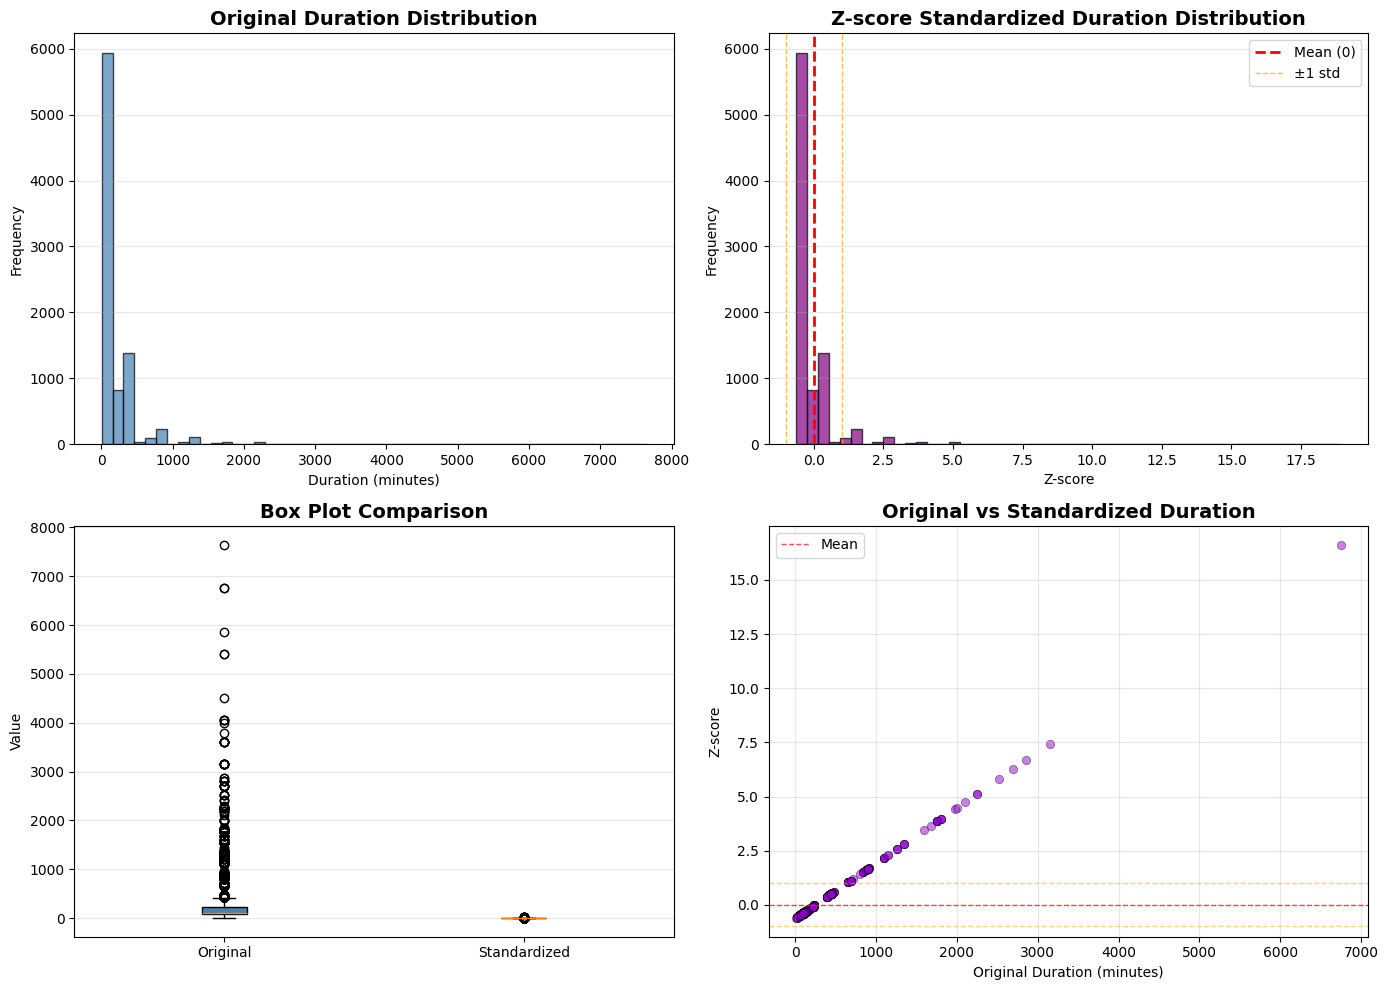


STATISTICS COMPARISON

Metric               Original             Standardized        
------------------------------------------------------------
Mean                 251.35               0.0000              
Median               112.00               -0.3567             
Std Dev              390.64               1.0001              
Min                  3.00                 -0.6358             
Max                  7650.00              18.9411             

Z-SCORE INTERPRETATION

Total non-null values: 8804
Within ±1 std dev (68% expected): 8165 (92.7%)
Within ±2 std dev (95% expected): 8497 (96.5%)
Outliers (|z| > 3): 150 (1.70%)
  - Low outliers (z < -3): 0
  - High outliers (z > 3): 150


In [357]:
# put your answer here
from sklearn.preprocessing import StandardScaler

# Apply Z-score Standardization to duration_minutes
# Remove any NaN values first
dur = df_clean['duration_minutes'].dropna().values.reshape(-1, 1)

# Initialize and fit the scaler
scaler = StandardScaler()
dur_zscore = scaler.fit_transform(dur)

# Add the standardized values back to the dataframe
df_clean['dur_zscore'] = np.nan
df_clean.loc[df_clean['duration_minutes'].notna(), 'dur_zscore'] = dur_zscore.flatten()

print("Z-score Standardization Applied!")
print(f"\nOriginal duration range: {df_clean['duration_minutes'].min():.2f} - {df_clean['duration_minutes'].max():.2f} minutes")
print(f"Standardized duration range: {df_clean['dur_zscore'].min():.2f} - {df_clean['dur_zscore'].max():.2f}")
print(f"\nStandardization formula: (X - mean) / std_dev")
print(f"Mean of original data: {df_clean['duration_minutes'].mean():.2f}")
print(f"Std dev of original data: {df_clean['duration_minutes'].std():.2f}")

# Display sample of standardized values
print("\nSample of original vs standardized values:")
sample = df_clean[['title', 'duration_minutes', 'dur_zscore']].dropna().head(10)
print(sample.to_string())

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Original duration distribution
axes[0, 0].hist(df_clean['duration_minutes'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Duration (minutes)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Standardized duration distribution
axes[0, 1].hist(df_clean['dur_zscore'].dropna(), bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Z-score Standardized Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Z-score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Mean (0)')
axes[0, 1].axvline(x=-1, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='±1 std')
axes[0, 1].axvline(x=1, color='orange', linestyle='--', linewidth=1, alpha=0.7)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Box plots comparison
data_to_plot = [df_clean['duration_minutes'].dropna(), df_clean['dur_zscore'].dropna()]
box = axes[1, 0].boxplot(data_to_plot, labels=['Original', 'Standardized'], patch_artist=True)
box['boxes'][0].set_facecolor('steelblue')
box['boxes'][1].set_facecolor('purple')
axes[1, 0].set_title('Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Scatter plot: Original vs Standardized
sample_data = df_clean[['duration_minutes', 'dur_zscore']].dropna().sample(min(1000, len(df_clean)))
axes[1, 1].scatter(sample_data['duration_minutes'], sample_data['dur_zscore'],
                   alpha=0.5, color='darkviolet', edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Original vs Standardized Duration', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Original Duration (minutes)')
axes[1, 1].set_ylabel('Z-score')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Mean')
axes[1, 1].axhline(y=-1, color='orange', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].axhline(y=1, color='orange', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics comparison
print("\n" + "="*60)
print("STATISTICS COMPARISON")
print("="*60)
print(f"\n{'Metric':<20} {'Original':<20} {'Standardized':<20}")
print("-"*60)
print(f"{'Mean':<20} {df_clean['duration_minutes'].mean():<20.2f} {df_clean['dur_zscore'].mean():<20.4f}")
print(f"{'Median':<20} {df_clean['duration_minutes'].median():<20.2f} {df_clean['dur_zscore'].median():<20.4f}")
print(f"{'Std Dev':<20} {df_clean['duration_minutes'].std():<20.2f} {df_clean['dur_zscore'].std():<20.4f}")
print(f"{'Min':<20} {df_clean['duration_minutes'].min():<20.2f} {df_clean['dur_zscore'].min():<20.4f}")
print(f"{'Max':<20} {df_clean['duration_minutes'].max():<20.2f} {df_clean['dur_zscore'].max():<20.4f}")

# Interpretation of Z-scores
print("\n" + "="*60)
print("Z-SCORE INTERPRETATION")
print("="*60)
outliers_low = (df_clean['dur_zscore'] < -3).sum()
outliers_high = (df_clean['dur_zscore'] > 3).sum()
within_1std = ((df_clean['dur_zscore'] >= -1) & (df_clean['dur_zscore'] <= 1)).sum()
within_2std = ((df_clean['dur_zscore'] >= -2) & (df_clean['dur_zscore'] <= 2)).sum()
total = df_clean['dur_zscore'].notna().sum()

print(f"\nTotal non-null values: {total}")
print(f"Within ±1 std dev (68% expected): {within_1std} ({within_1std/total*100:.1f}%)")
print(f"Within ±2 std dev (95% expected): {within_2std} ({within_2std/total*100:.1f}%)")
print(f"Outliers (|z| > 3): {outliers_low + outliers_high} ({(outliers_low + outliers_high)/total*100:.2f}%)")
print(f"  - Low outliers (z < -3): {outliers_low}")
print(f"  - High outliers (z > 3): {outliers_high}")

## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

Overall df_clean bin counts:
 duration_equal_width_bin
(-4.647, 1532.4]    8656
(1532.4, 3061.8]     121
(3061.8, 4591.2]      21
(4591.2, 6120.6]       3
(6120.6, 7650.0]       3
Name: count, dtype: int64

Movies bin counts (based on overall bins):
 duration_equal_width_bin
(-4.647, 1532.4]    6128
(1532.4, 3061.8]       0
(3061.8, 4591.2]       0
(4591.2, 6120.6]       0
(6120.6, 7650.0]       0
Name: count, dtype: int64

Shows bin counts (based on overall bins):
 duration_equal_width_bin
(-4.647, 1532.4]    2528
(1532.4, 3061.8]     121
(3061.8, 4591.2]      21
(4591.2, 6120.6]       3
(6120.6, 7650.0]       3
Name: count, dtype: int64


/tmp/ipython-input-2653618464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_width_bin'] = pd.cut(df_clean['duration_minutes'], bins=5)


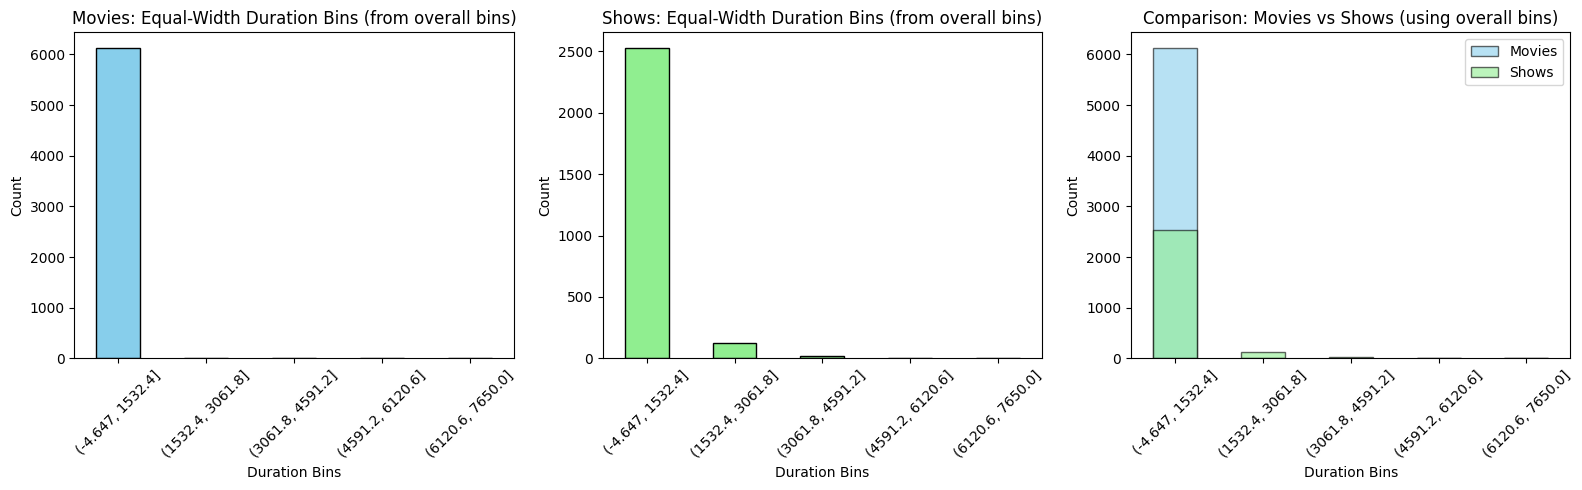

In [358]:
import matplotlib.pyplot as plt

# Apply equal-width binning to the entire df_clean['duration_minutes'] into 5 bins
df_clean['duration_equal_width_bin'] = pd.cut(df_clean['duration_minutes'], bins=5)

# 1. Separate movies and shows (using the newly created binned column from df_clean)
movies = df_clean[df_clean['type'] == 'Movie'].copy()
shows = df_clean[df_clean['type'] == 'TV Show'].copy()

# 2. View bin counts for the overall df_clean
print("Overall df_clean bin counts:\n", df_clean['duration_equal_width_bin'].value_counts().sort_index())

# For plotting, we can show movies and shows separately, using their respective counts within the global bins
print("\nMovies bin counts (based on overall bins):\n", movies['duration_equal_width_bin'].value_counts().sort_index())
print("\nShows bin counts (based on overall bins):\n", shows['duration_equal_width_bin'].value_counts().sort_index())

# 3. Plot histograms
plt.figure(figsize=(16, 5))

# Movies histogram
plt.subplot(1, 3, 1)
movies['duration_equal_width_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='skyblue'
)
plt.title('Movies: Equal-Width Duration Bins (from overall bins)')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Shows histogram
plt.subplot(1, 3, 2)
shows['duration_equal_width_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='lightgreen'
)
plt.title('Shows: Equal-Width Duration Bins (from overall bins)')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Comparison histogram
plt.subplot(1, 3, 3)
movies['duration_equal_width_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='skyblue', alpha=0.6, label='Movies'
)
shows['duration_equal_width_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='lightgreen', alpha=0.6, label='Shows'
)
plt.title('Comparison: Movies vs Shows (using overall bins)')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [359]:
# put your answer here
df_clean['duration_equal_width_bin'].cat.categories

df_clean['duration_equal_width_bin'].value_counts().sort_index()

,count
duration_equal_width_bin,
"(-4.647, 1532.4]",8656
"(1532.4, 3061.8]",121
"(3061.8, 4591.2]",21
"(4591.2, 6120.6]",3
"(6120.6, 7650.0]",3


Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

/tmp/ipython-input-3742089237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_equal_freq_bin'] = pd.qcut(df_clean['duration_minutes'], q=4, duplicates='drop')


Overall df_clean bin counts:
 duration_equal_freq_bin
(2.999, 92.0]      2263
(92.0, 112.0]      2212
(112.0, 230.0]     2183
(230.0, 7650.0]    2146
Name: count, dtype: int64

Movies bin counts (based on overall bins):
 duration_equal_freq_bin
(2.999, 92.0]      2263
(92.0, 112.0]      2212
(112.0, 230.0]     1648
(230.0, 7650.0]       5
Name: count, dtype: int64

Shows bin counts (based on overall bins):
 duration_equal_freq_bin
(2.999, 92.0]         0
(92.0, 112.0]         0
(112.0, 230.0]      535
(230.0, 7650.0]    2141
Name: count, dtype: int64


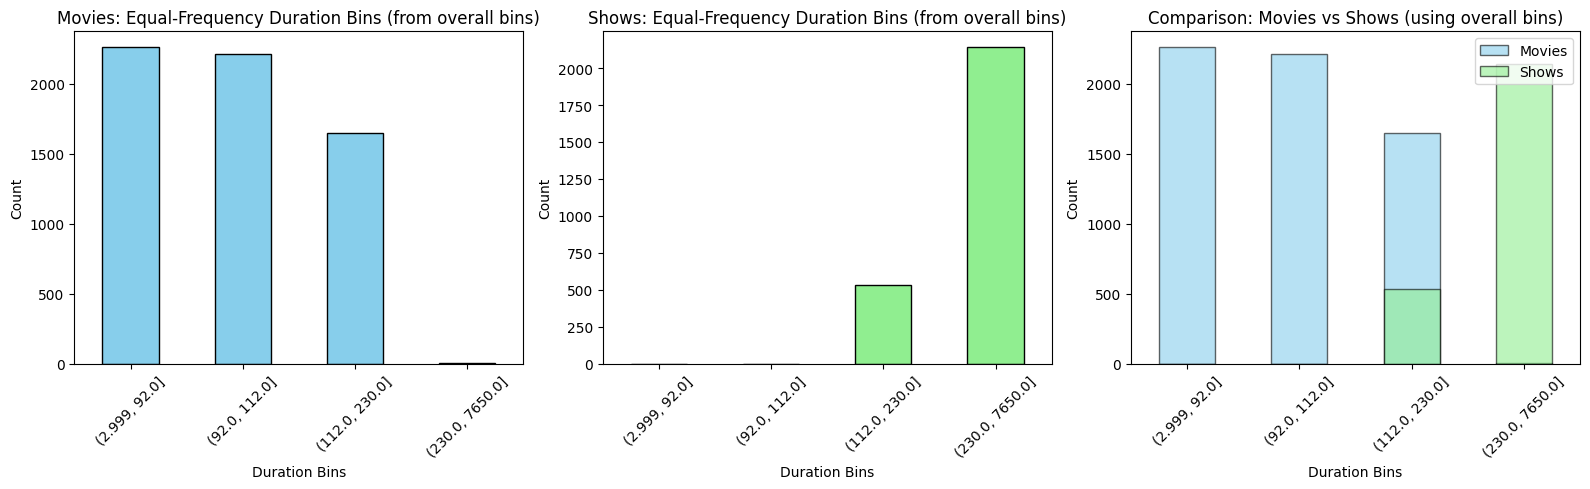

In [363]:
# put your answer here
import matplotlib.pyplot as plt

# Apply equal-frequency (quantile) binning to the entire df_clean['duration_minutes'] into 4 bins
df_clean['duration_equal_freq_bin'] = pd.qcut(df_clean['duration_minutes'], q=4, duplicates='drop')

# 1. Separate movies and shows (using the newly created binned column from df_clean)
movies = df_clean[df_clean['type'] == 'Movie'].copy()
shows = df_clean[df_clean['type'] == 'TV Show'].copy()

# 2. View bin counts for the overall df_clean
print("Overall df_clean bin counts:\n", df_clean['duration_equal_freq_bin'].value_counts().sort_index())

# For plotting, we can show movies and shows separately, using their respective counts within the global bins
print("\nMovies bin counts (based on overall bins):\n", movies['duration_equal_freq_bin'].value_counts().sort_index())
print("\nShows bin counts (based on overall bins):\n", shows['duration_equal_freq_bin'].value_counts().sort_index())

# 3. Plot histograms
plt.figure(figsize=(16, 5))

# Movies histogram
plt.subplot(1, 3, 1)
movies['duration_equal_freq_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='skyblue'
)
plt.title('Movies: Equal-Frequency Duration Bins (from overall bins)')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Shows histogram
plt.subplot(1, 3, 2)
shows['duration_equal_freq_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='lightgreen'
)
plt.title('Shows: Equal-Frequency Duration Bins (from overall bins)')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Comparison histogram
plt.subplot(1, 3, 3)
movies['duration_equal_freq_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='skyblue', alpha=0.6, label='Movies'
)
shows['duration_equal_freq_bin'].value_counts().sort_index().plot(
    kind='bar', edgecolor='black', color='lightgreen', alpha=0.6, label='Shows'
)
plt.title('Comparison: Movies vs Shows (using overall bins)')
plt.xlabel('Duration Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [364]:
# put your answer here
df_clean['duration_equal_freq_bin'].cat.categories

df_clean['duration_equal_freq_bin'].value_counts().sort_index()

,count
duration_equal_freq_bin,
"(2.999, 92.0]",2263
"(92.0, 112.0]",2212
"(112.0, 230.0]",2183
"(230.0, 7650.0]",2146


## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [365]:
df_num = df_clean.select_dtypes(include=['number'])
print(df_num)

      release_year  duration_minutes  dur_minmax  dur_zscore
0             2020                90    0.011377   -0.413064
1             2021               900    0.117301    1.660599
2             2021               450    0.058454    0.508564
3             2021               420    0.054531    0.431762
4             2021               440    0.057147    0.482963
...            ...               ...         ...         ...
8802          2007               158    0.020269   -0.238979
8803          2018               440    0.057147    0.482963
8804          2009                88    0.011115   -0.418184
8805          2006                88    0.011115   -0.418184
8806          2015               111    0.014123   -0.359302

[8804 rows x 4 columns]


In [366]:
df_clean.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_minutes', 'dur_minmax', 'dur_zscore',
       'duration_equal_width_bin', 'duration_equal_freq_bin'],
      dtype='object')

In [367]:
# put your answer here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Select two numeric columns as features (replace with your actual numeric columns)
X = df_clean[['duration_minutes', 'release_year']]  # example: 'dur' and another numeric column
y = df_clean['type']  # target column (classification)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train KNN classifier (without scaling)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 4. Predict on test set
y_pred = knn.predict(X_test)

# 5. Store accuracy
acc_raw = accuracy_score(y_test, y_pred)
print(f"KNN accuracy without scaling: {acc_raw:.4f}")

KNN accuracy without scaling: 0.9989


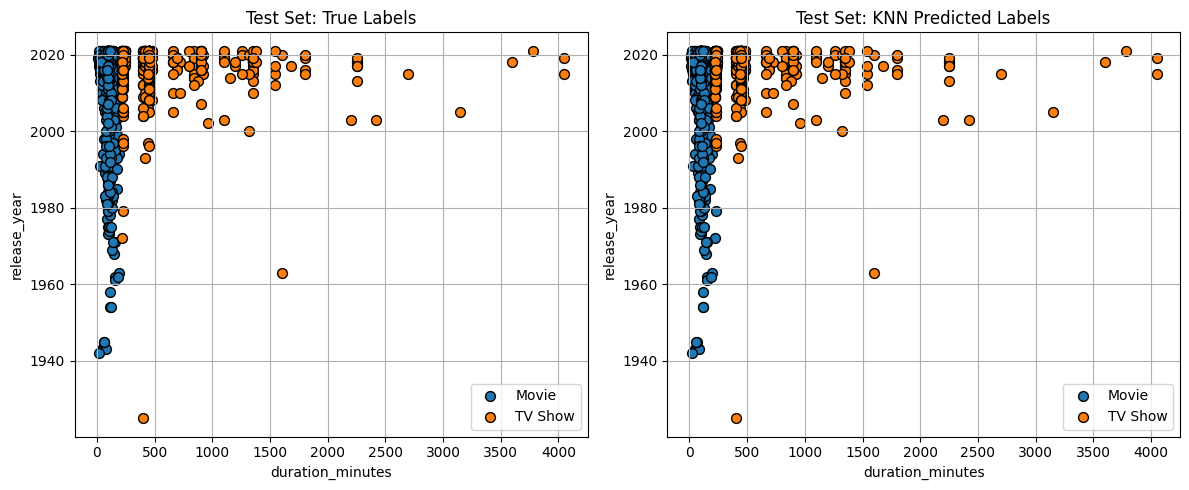

In [368]:
import numpy as np
import matplotlib.pyplot as plt

# Feature names
feature1 = 'duration_minutes'
feature2 = 'release_year'

# Plot 1: True labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for label in y.unique():
    plt.scatter(
        X_test[y_test == label][feature1],
        X_test[y_test == label][feature2],
        label=label,
        edgecolor='k',
        s=50
    )
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Test Set: True Labels')
plt.legend()
plt.grid(True)

# Plot 2: Predicted labels
plt.subplot(1, 2, 2)
for label in y.unique():
    plt.scatter(
        X_test[y_pred == label][feature1],
        X_test[y_pred == label][feature2],
        label=label,
        edgecolor='k',
        s=50
    )
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Test Set: KNN Predicted Labels')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [369]:
# put your answer here
# Feature matrix and target
X = df_clean[['duration_minutes', 'release_year']]
y = df_clean['type']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------
# Min-Max Scaling
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and store accuracy
y_pred_scaled = knn.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"KNN accuracy with scaling: {acc_scaled:.4f}")

KNN accuracy with scaling: 0.9938


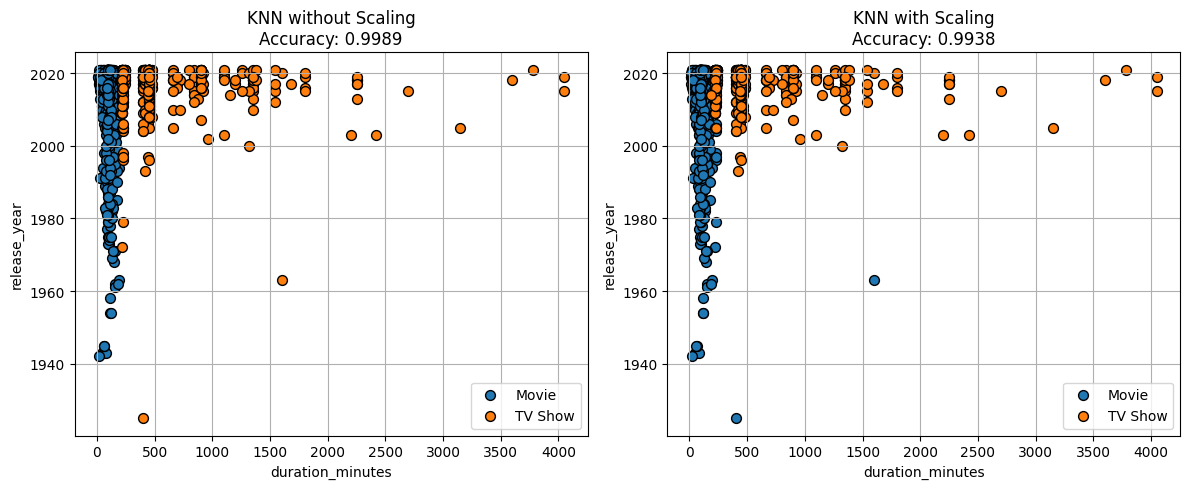

In [370]:
feature1 = 'duration_minutes'
feature2 = 'release_year'

plt.figure(figsize=(12, 5))

# --- Plot 1: KNN without scaling ---
plt.subplot(1, 2, 1)
for label in y.unique():
    plt.scatter(
        X_test[y_test == label][feature1],
        X_test[y_test == label][feature2],
        label=label,
        edgecolor='k',
        s=50
    )
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KNN without Scaling\nAccuracy: {acc_raw:.4f}')
plt.legend()
plt.grid(True)

# --- Plot 2: KNN with scaling ---
plt.subplot(1, 2, 2)
for label in y.unique():
    plt.scatter(
        X_test[y_pred_scaled == label][feature1],
        X_test[y_pred_scaled == label][feature2],
        label=label,
        edgecolor='k',
        s=50
    )
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KNN with Scaling\nAccuracy: {acc_scaled:.4f}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Did scaling improve accuracy? Explain why.

# MY ANSWER:

The scaling did not improved after applying scaling. KNN without scaling can sometimes outperform KNN with scaling if the original feature ranges are already comparable, so scaling may unnecessarily alter the relative influence of each feature. Scaling can also reduce the weight of a more informative feature, leading to slightly worse predictions. Additionally, the uneven distributions in the duration column can cause fluctuations in accuracy, making scaling not always beneficial.